## clustering: machine learning
### contents:
#### 01 import libraries & data
#### 02 clean data/rename columns
#### 03 the elbow technique
#### 04 k-means clustering

# 01 import libraries & data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl
import category_encoders as ce

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged3.csv'), index_col = False)

# 02 clean data/rename columns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,3.0,CALM,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,10.0,WSW,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,9.0,CALM,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,10.0,SSW,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,10.0,SSE,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000


In [8]:
#create object for one-hot encoding
#this is the website to do this: 
# https://medium.com/analytics-vidhya/heres-all-you-need-to-know-about-encoding-categorical-data-with-python-code-53e367a79b5c
encoder = ce.OneHotEncoder(cols = 'Airport_Type', handle_unknown = 'return_nan', return_df = True, use_cat_names = True)

In [10]:
#fit & transform data
data_encoded = encoder.fit_transform(df)

C:\Users\erhil\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [15]:
#drop categorical columns to analyze using k-means algorithm
data_encoded.drop(columns = ['ID', 'City', 'County', 'State', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Start_Time_no_ext', 'End_Time_no_ext', 'Zipcode_no_ext', 'Airport_Name', 'project_time_length'], inplace = True)

In [17]:
data_encoded.head()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),Airport_Type_large_airport,Airport_Type_medium_airport,Airport_Type_small_airport,Airport_Type_closed,Airport_Type_heliport,dist_to_weather(mi),const_total_minutes
0,2,0.433173,55.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.673991,23.500000
1,2,0.192266,37.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,9.058579,121.416667
2,4,0.032112,54.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,6.800913,11352.833333
3,2,0.996057,73.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,21.136875,1746.900000
4,2,0.747595,84.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,2.452856,29.000000


In [21]:
#redo total construction time into hours instead of minutes
data_encoded['const_total_hr'] = data_encoded['const_total_minutes']/60

In [22]:
data_encoded.drop(columns = ['const_total_minutes'], inplace = True)

In [23]:
data_encoded.head()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),Airport_Type_large_airport,Airport_Type_medium_airport,Airport_Type_small_airport,Airport_Type_closed,Airport_Type_heliport,dist_to_weather(mi),const_total_hr
0,2,0.433173,55.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.673991,0.391667
1,2,0.192266,37.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,9.058579,2.023611
2,4,0.032112,54.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,6.800913,189.213889
3,2,0.996057,73.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,21.136875,29.115000
4,2,0.747595,84.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,2.452856,0.483333


# 03 the elbow technique

In [24]:
num_cl = range(1, 10) #defines the range of potential clusters
kmeans = [KMeans(n_clusters = i) for i in num_cl] #defines kmeans clusters

In [25]:
#create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(data_encoded).score(data_encoded) for i in range(len(kmeans))]
score

[-18160713772125.703,
 -6946338783162.816,
 -2745827809679.094,
 -1699239419756.7083,
 -1014815895831.647,
 -681790887735.6343,
 -485057921642.693,
 -370275422518.12463,
 -288280211953.5981]

Text(0.5, 0, 'Number of Clusters')

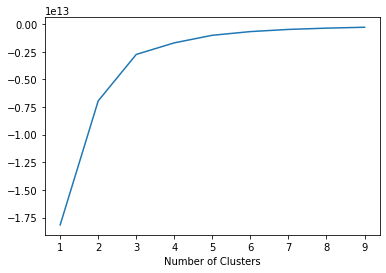

In [26]:
#plot the elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')

The optimal count for clusters is 3 since the elbow curve flattens out after that.

# 04 k-means clustering

In [27]:
#create the k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [28]:
#fit the k-means object to the data

kmeans.fit(data_encoded)

C:\Users\erhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [31]:
#create a new column "clusters" to show which cluster that record belongs to
data_encoded['clusters'] = kmeans.fit_predict(data_encoded)

C:\Users\erhil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [32]:
data_encoded.head()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),Airport_Type_large_airport,Airport_Type_medium_airport,Airport_Type_small_airport,Airport_Type_closed,Airport_Type_heliport,dist_to_weather(mi),const_total_hr,clusters
0,2,0.433173,55.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.673991,0.391667,0
1,2,0.192266,37.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,9.058579,2.023611,0
2,4,0.032112,54.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,6.800913,189.213889,0
3,2,0.996057,73.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,21.136875,29.115000,0
4,2,0.747595,84.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,2.452856,0.483333,0


In [33]:
data_encoded['clusters'].value_counts(dropna = False)
#a majority of the data is in cluster "0"

0    4862200
1     271669
2      19781
Name: clusters, dtype: int64

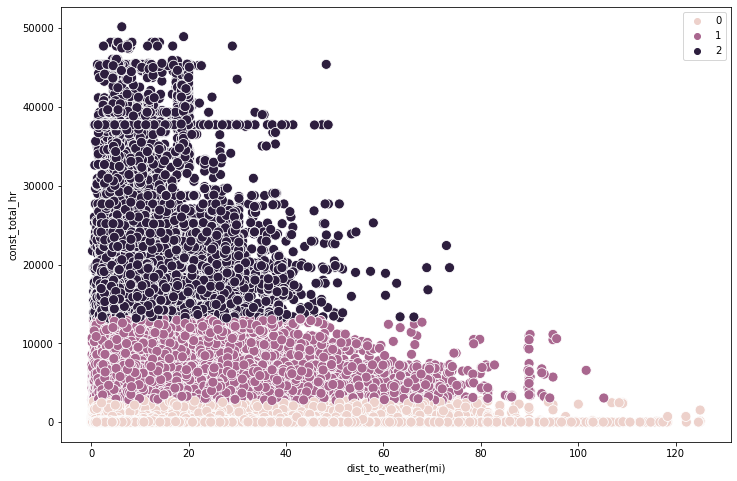

In [36]:
#plot the clusters for "distance_to_weather(mi)" and "const_total_minutes"

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = data_encoded['dist_to_weather(mi)'], y = data_encoded['const_total_hr'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('dist_to_weather(mi)')
plt.ylabel('const_total_hr')
plt.show()

The clusters above seem to be made up of data that took the least, middle, and longest amounts of time to complete. 

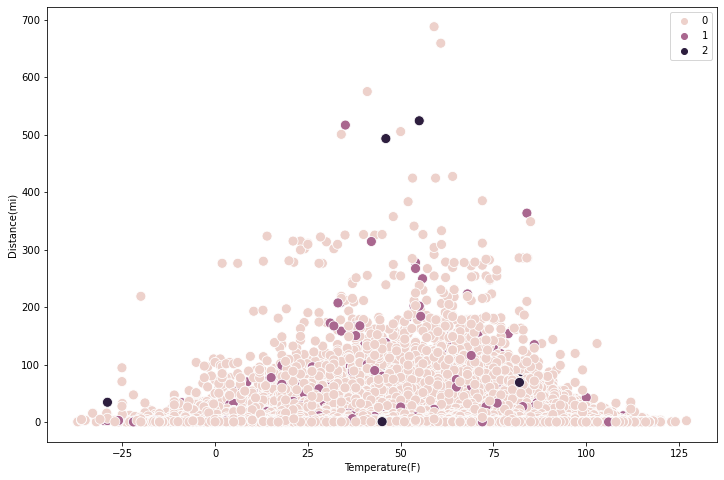

In [40]:
#plot the clusters for "distance_to_weather(mi)" and "Distance(mi)"

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = data_encoded['Temperature(F)'], y = data_encoded['Distance(mi)'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Temperature(F)')
plt.ylabel('Distance(mi)')
plt.show()

The clusters here seem all over the place. The pink spans all temperatures and all distances, the purple and dark purple seem randomly dispersed in relatively proportionate values across the whole scale as well, with a majority in the lower distanced construction and in the "middle" temperatures.

In [38]:
data_encoded.loc[data_encoded['clusters'] == 0, 'cluster'] = 'pink'
data_encoded.loc[data_encoded['clusters'] == 1, 'cluster'] = 'purple'
data_encoded.loc[data_encoded['clusters'] == 2, 'cluster'] = 'dark purple'

In [41]:
data_encoded.groupby('cluster').agg({'Temperature(F)' : ['mean', 'median'],
                                     'Distance(mi)' : ['mean', 'median'],
                                     'dist_to_weather(mi)' : ['mean', 'median'],
                                     'const_total_hr' :['mean', 'median']})

Temperature(F)        Distance(mi)           dist_to_weather(mi)  \
                      mean median         mean    median                mean   
cluster                                                                        
dark purple      62.647242   64.9     1.747503  0.481821           10.134438   
pink             63.937257   66.0     1.354755  0.375169            8.810913   
purple           63.128496   66.0     1.345356  0.321216            9.275403   

                      const_total_hr                
               median           mean        median  
cluster                                             
dark purple  7.331082   20851.565364  18291.275000  
pink         6.674553      94.220132      6.283333  
purple       6.910696    5366.256152   5081.848333

Given these clusters, it seems as though with these variables, the central tendencies are the same/very similar for the 'Temperature(F)', the 'Distance(mi)' of construction, and 'dist_to_weather(mi)'. 
The clusters are very clearly separated for the 'const_total_hr' with the pink representing the shortest construction time, purple representing the medium construction time, and dark purple the longest construction time.